In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [139]:
df = pd.read_csv('listings.csv')

In [140]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

<AxesSubplot: >

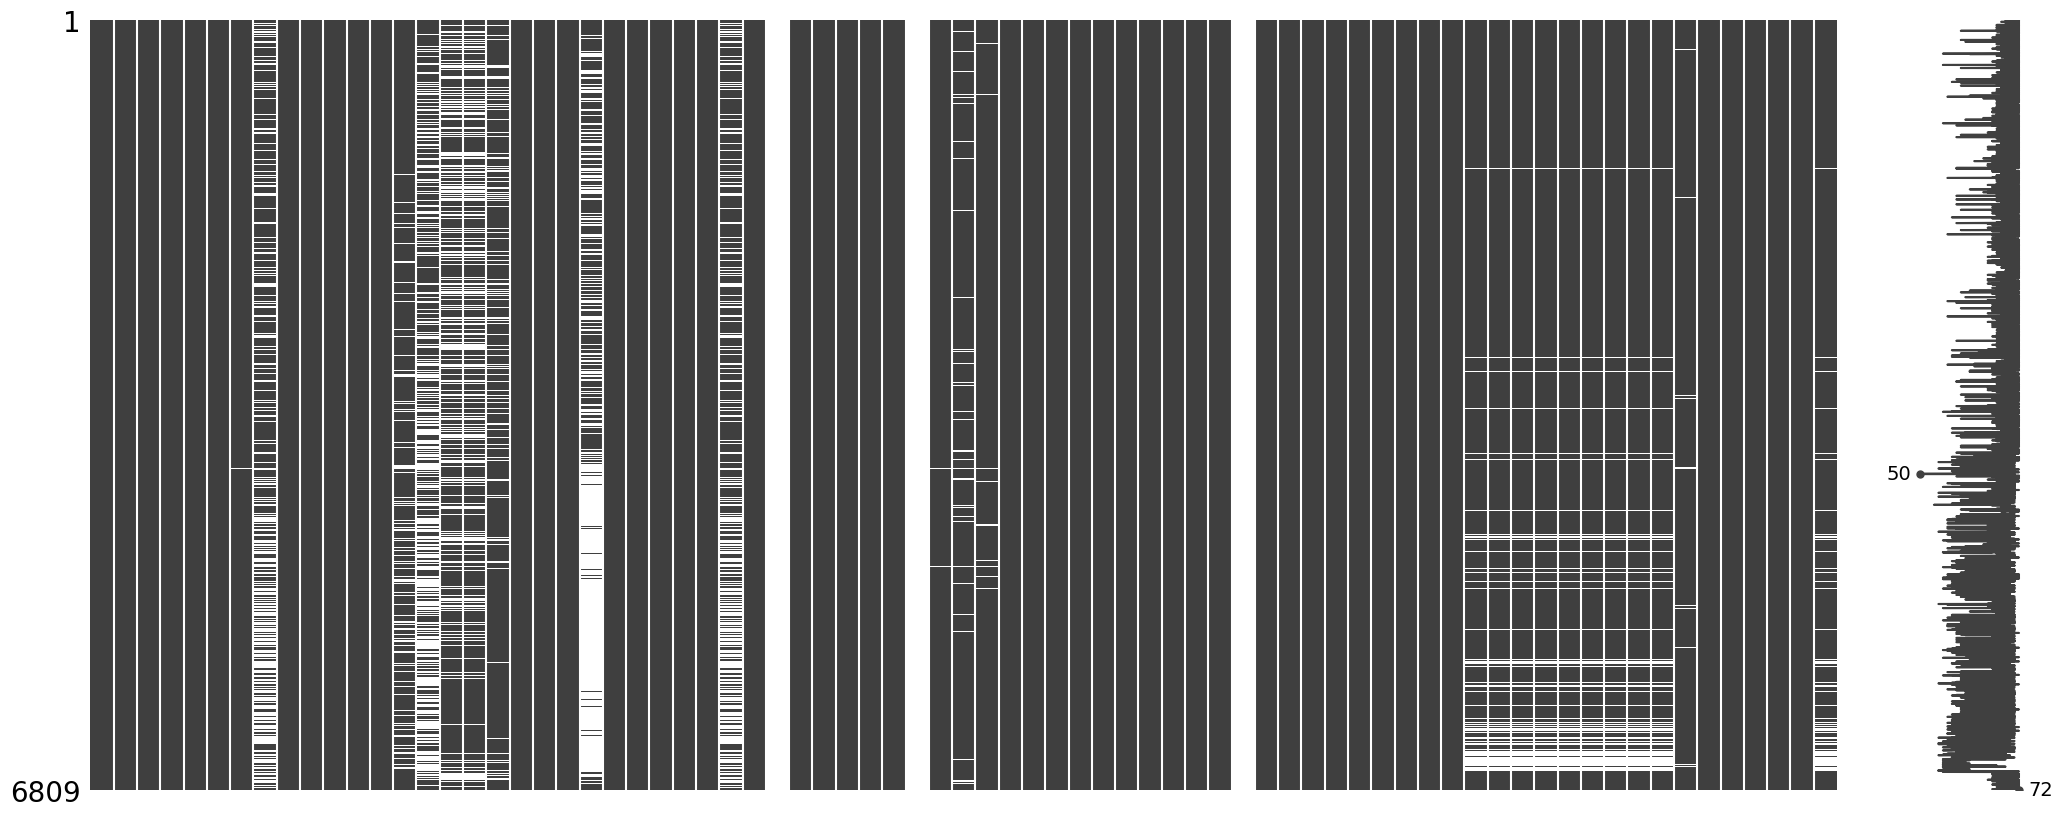

In [141]:
msno.matrix(df)

In [142]:
df = df.drop(['neighbourhood_group_cleansed','bathrooms','calendar_updated','scrape_id'],axis=1)

<AxesSubplot: >

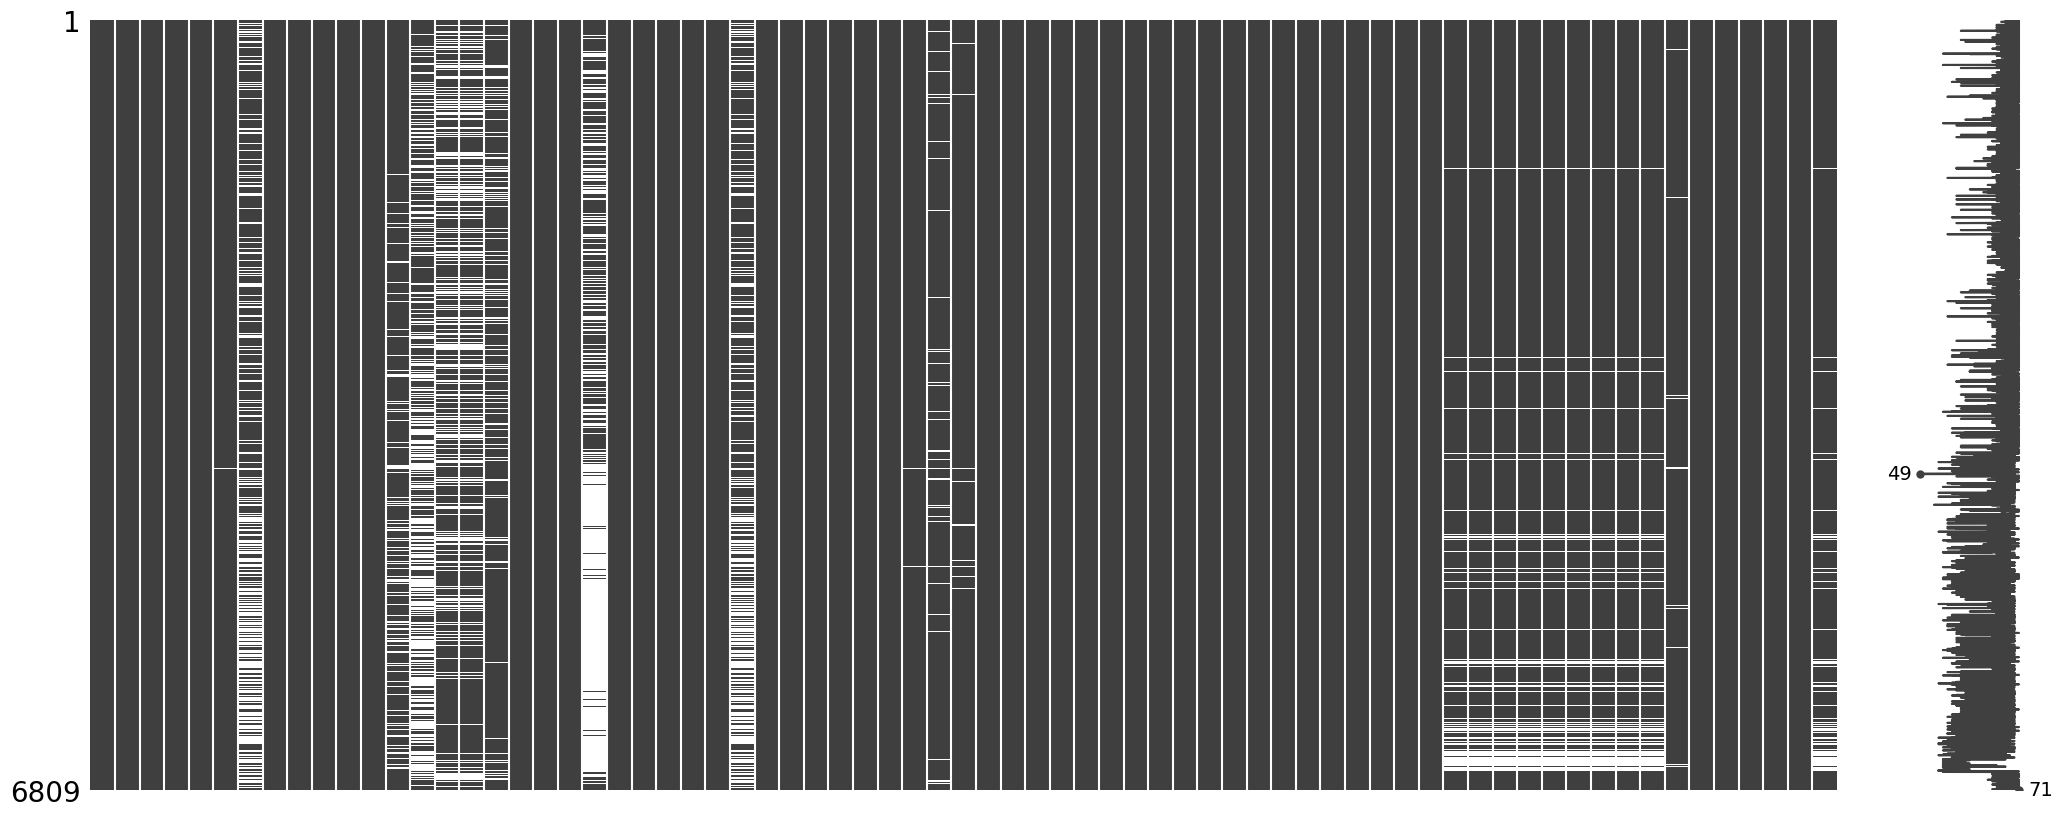

In [143]:
msno.matrix(df)

In [144]:

missing_percent = df.isna().sum() / df.shape[0] * 100

# Get the names of columns that have more than 90% missing data
cols_to_drop = missing_percent[missing_percent > 90].index

# Drop the columns with more than 90% missing data
df = df.drop(cols_to_drop, axis=1)

<AxesSubplot: >

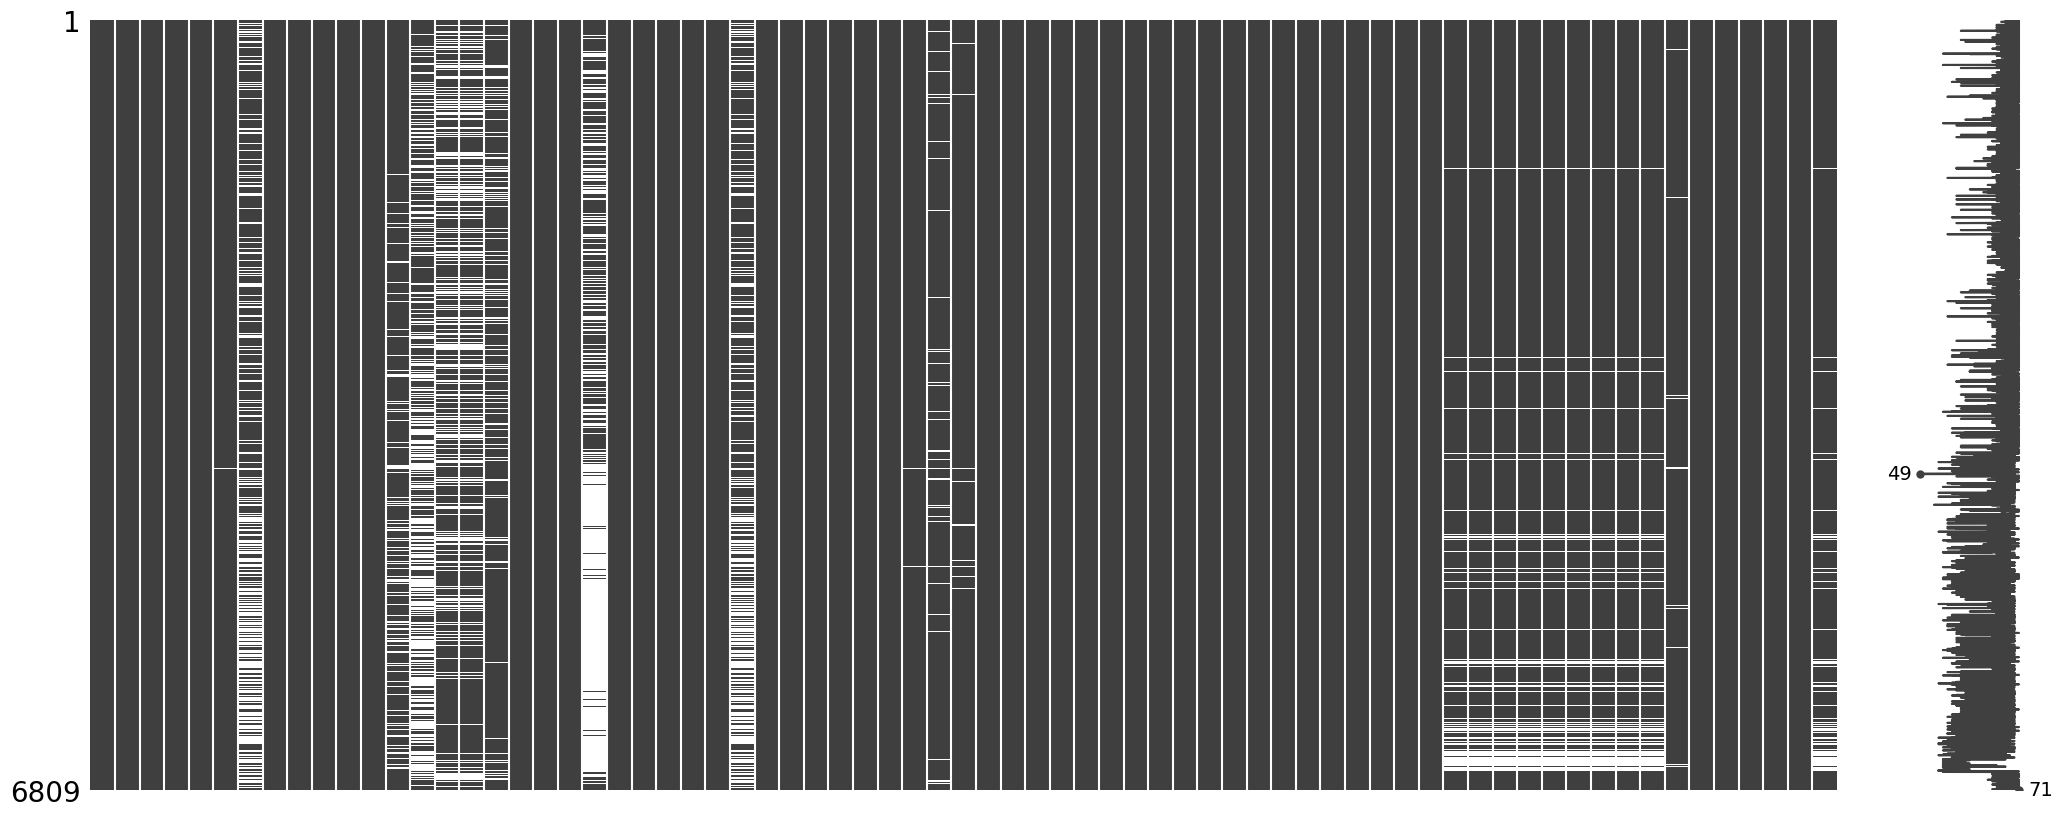

In [145]:
msno.matrix(df)

In [146]:
# ax = df.hist(figsize=(50,50))

In [147]:
threshold = len(df.columns) * 0.9
df = df.dropna(thresh=threshold, axis=0)

<AxesSubplot: >

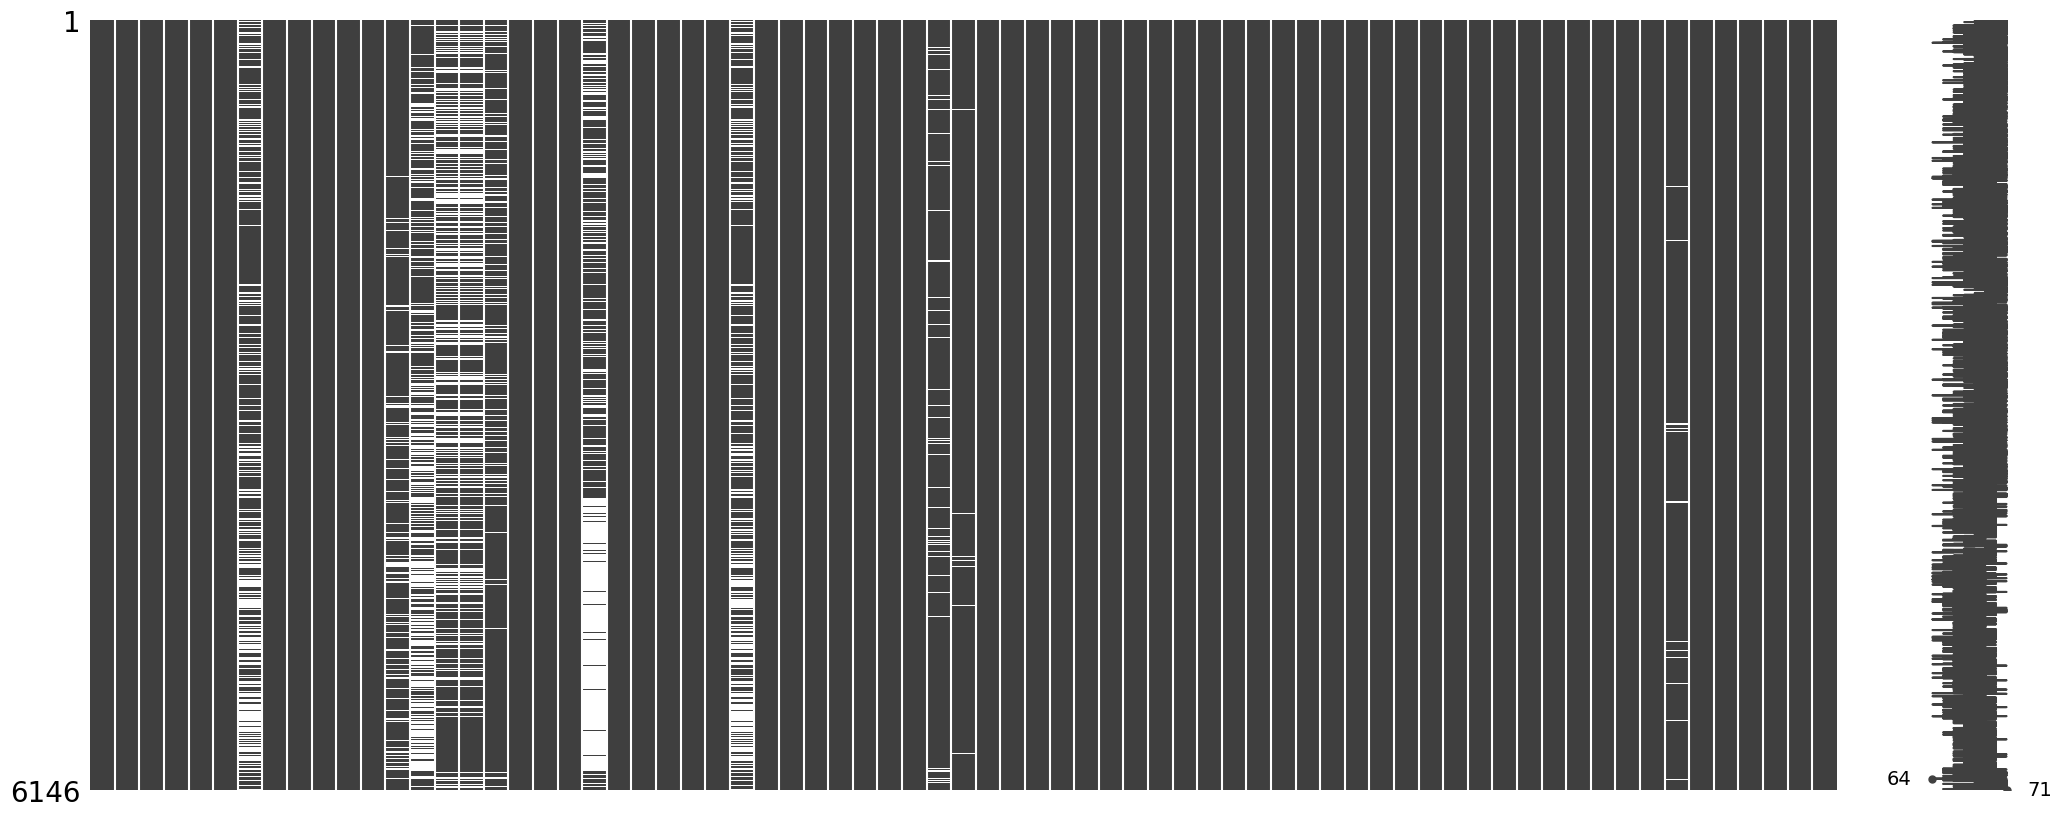

In [148]:
msno.matrix(df)

In [149]:
df.fillna(0, inplace=True)

<AxesSubplot: >

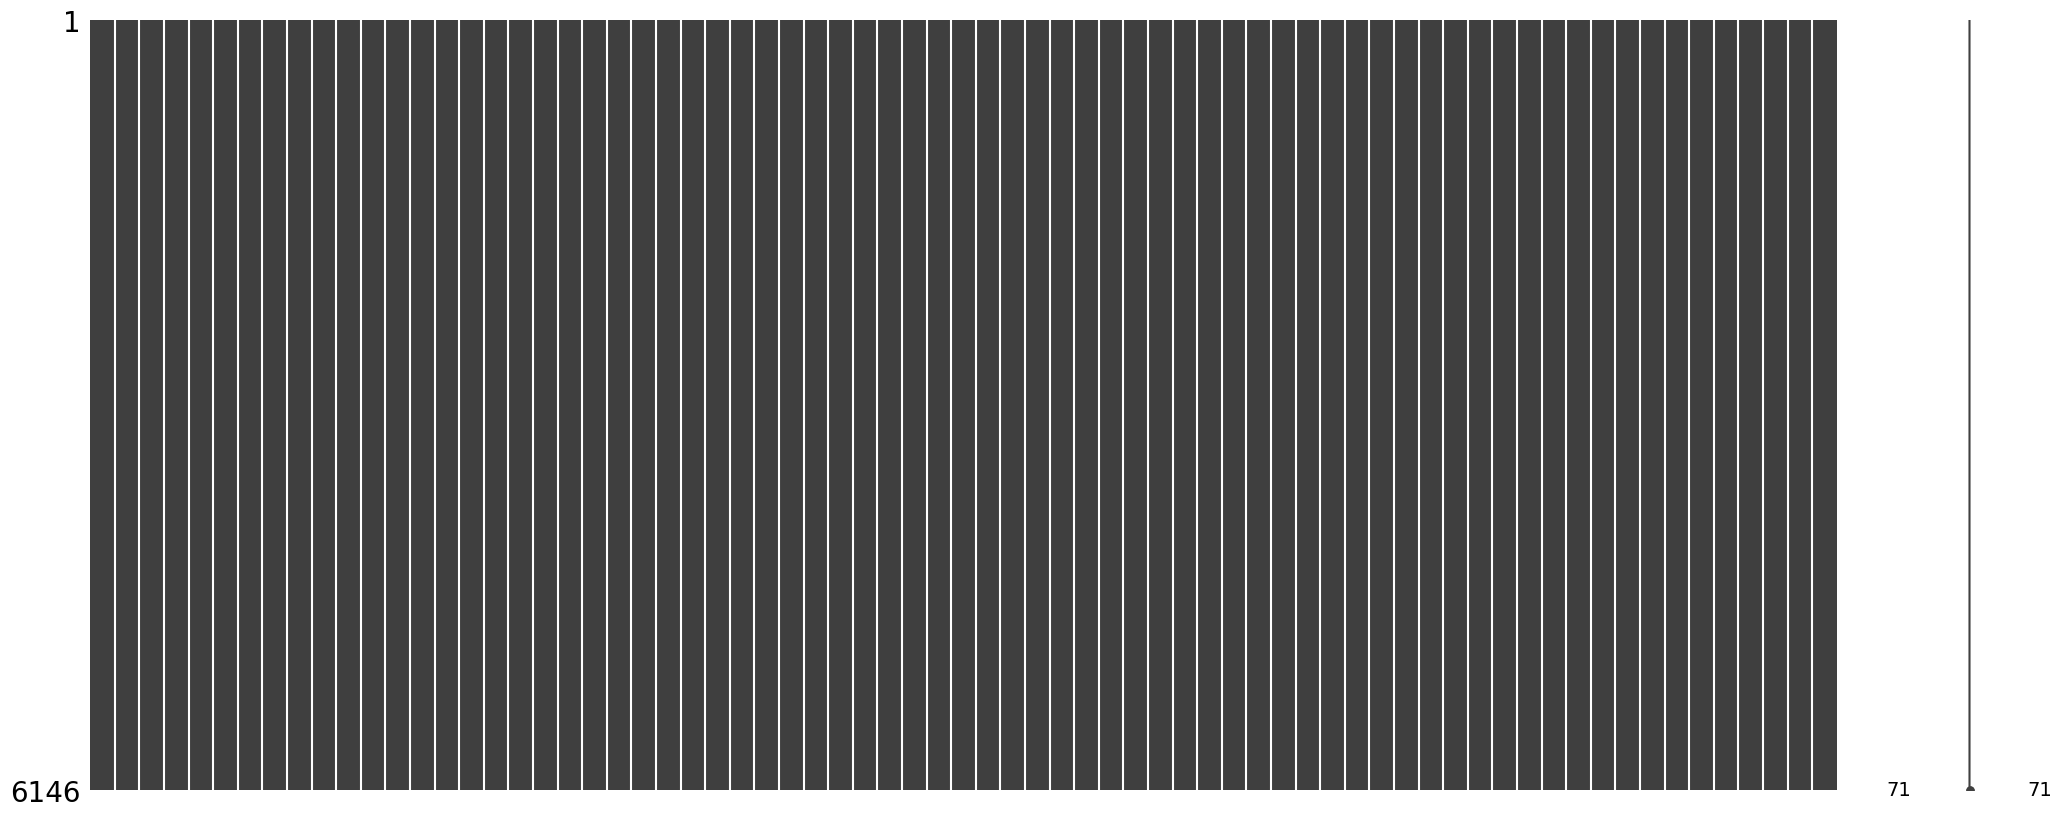

In [150]:
msno.matrix(df)

In [151]:
df.to_csv('listing_clean.csv')